In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
# Steps
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and Output columns
# 2. Scale the values
# 3. Train test split   
# 4. Train the model
# 5. Evaluate the model/model selection
# Deploy the nodel

In [5]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df.drop("Unnamed: 0" , axis=1 , inplace=True)

In [8]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'IQ')

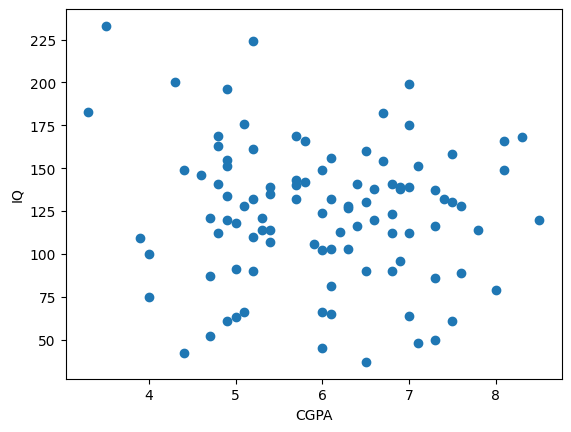

In [10]:
plt.scatter(df["cgpa"], df["iq"])
plt.xlabel("CGPA")
plt.ylabel("IQ")

Text(0, 0.5, 'IQ')

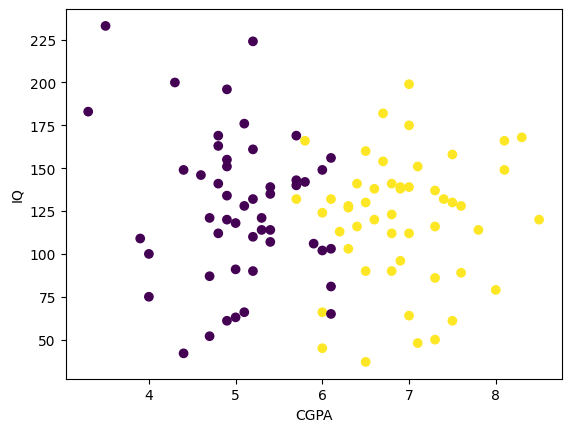

In [11]:
plt.scatter(df["cgpa"], df["iq"] , c =df["placement"])
plt.xlabel("CGPA")
plt.ylabel("IQ") 

# hue = "placement"

In [12]:
x=df.iloc[:,0:2]
y=df.iloc[: , -1]

In [13]:
x


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.model_selection import train_test_split

x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.1)

In [17]:
x_train

,cgpa,iq
96,4.4,42.0
82,6.5,37.0
62,6.0,102.0
94,4.7,52.0
74,6.7,154.0
...,...,...
78,6.1,81.0
32,7.0,139.0
79,6.5,90.0
30,7.6,128.0


In [18]:
y_train

96    0
82    1
62    0
94    0
74    1
     ..
78    0
32    1
79    1
30    1
72    1
Name: placement, Length: 90, dtype: int64

In [19]:
x_test

,cgpa,iq
46,5.3,114.0
9,5.1,66.0
83,7.5,130.0
17,3.3,183.0
18,4.0,100.0
27,6.0,124.0
58,8.0,79.0
55,7.8,114.0
44,7.5,61.0
76,4.9,155.0


In [20]:
y_test

46    0
9     0
83    1
17    0
18    0
27    1
58    1
55    1
44    1
76    0
Name: placement, dtype: int64

In [21]:
# SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [22]:
x_train = scaler.fit_transform(x_train) 

In [23]:
x_train

array([[-1.48568027, -2.07500333],
       [ 0.46834597, -2.20030547],
       [ 0.00310163, -0.57137773],
       [-1.20653366, -1.82439906],
       [ 0.65444371,  0.73176446],
       [-1.02043593, -0.12029005],
       [-1.11348479,  0.40597891],
       [-0.18299611,  0.43103934],
       [ 1.95712787,  0.60646233],
       [-1.11348479,  0.9573083 ],
       [ 0.84054145,  0.35585806],
       [-0.27604498,  1.10767086],
       [ 0.56139484,  0.33079763],
       [ 0.84054145,  0.33079763],
       [-0.55519158, -0.4460756 ],
       [ 0.0961505 , -0.5463173 ],
       [ 0.00310163, -1.47355309],
       [ 0.00310163,  0.60646233],
       [ 0.46834597,  0.88212702],
       [ 1.21273692, -1.87451992],
       [ 1.49188353, -0.89716328],
       [ 0.74749258, -0.32077346],
       [-0.55519158,  0.35585806],
       [ 0.84054145, -0.72174029],
       [-1.85787574, -1.24800925],
       [ 0.0961505 , -1.49861352],
       [ 0.0961505 ,  0.18043507],
       [-1.57872914,  1.88454409],
       [-0.08994724,

In [24]:
x_test = scaler.fit_transform(x_test)

In [25]:
x_test

array([[-0.40075212,  0.03837071],
       [-0.52598715, -1.27719655],
       [ 0.97683328,  0.47689313],
       [-1.65310248,  1.92949865],
       [-1.21477985, -0.34533641],
       [ 0.03757051,  0.31244723],
       [ 1.28992087, -0.92089708],
       [ 1.16468584,  0.03837071],
       [ 0.97683328, -1.41423481],
       [-0.65122219,  1.16208442]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [29]:
# model evaluation
y_pred= clf.predict(x_test)

In [30]:
y_test

46    0
9     0
83    1
17    0
18    0
27    1
58    1
55    1
44    1
76    0
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_pred, y_test)

1.0

In [33]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

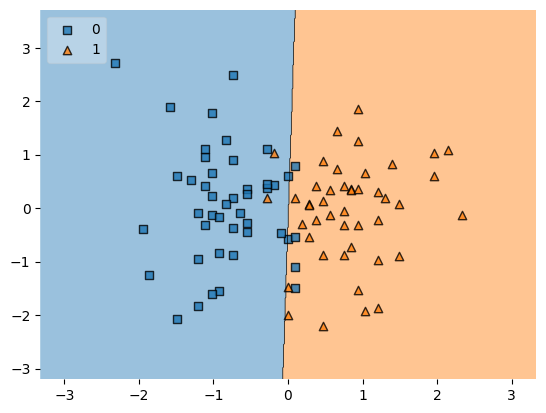

In [34]:
# To visualize the parameters the model used to make the decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train , y_train.values, clf=clf ,legend =2)

In [35]:
# exporting the model 

import pickle

In [36]:
pickle.dump(clf , open('model.pkl' , "wb"))